In [1]:
import anndata as ad
import scanpy as sc
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
%run -i 0_functions.py

In [3]:
from dynchro.tl import traceback

In [4]:
id_name = {}

counter = 0
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        id_name[counter] = {"rep": i, "subset": j, "cell_type": "mono"}
        # print(counter)
        counter += 1

for i in [1, 2, 3]:
    for j in range(division):
        id_name[counter] = {"rep": i, "subset": j, "cell_type": "ery"}
        # print(counter)
        counter += 1

In [5]:
results_all_subsets = pickle.load(open("data/results_dynchro_hvg_subsets_no_dup_norm2.pkl", "rb"))

# Bad alignment

In [6]:
d1_id = 10
d2_id = 23

In [7]:
res1.path1()

NameError: name 'res1' is not defined

2023 2023


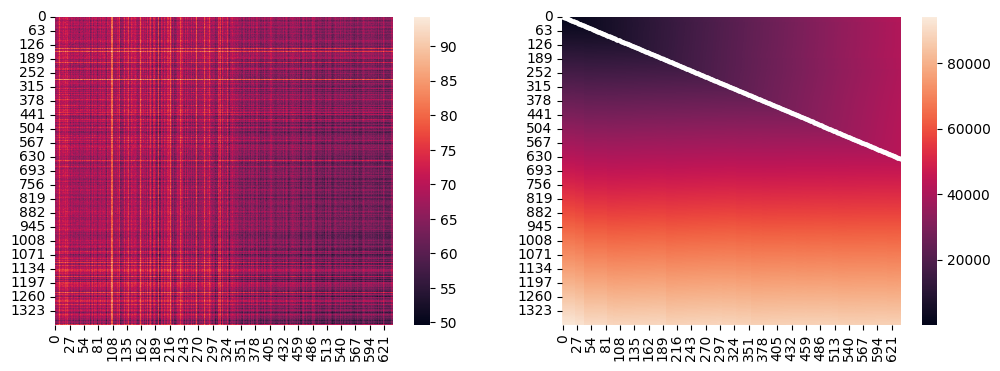

In [8]:
res1 = results_all_subsets[d1_id][d2_id][0]
res1.plot_cost_distances()

start with results_all_subsets 10, 23

In [9]:
dataset1 = read_with_pc(f"data/rep{id_name[d1_id]['rep']}_{id_name[d1_id]['cell_type']}_subset{id_name[d1_id]['subset']}_hvg.h5ad")
dataset2 = read_with_pc(f"data/rep{id_name[d2_id]['rep']}_{id_name[d2_id]['cell_type']}_subset{id_name[d2_id]['subset']}_hvg.h5ad")

In [10]:
path2, path1 = traceback_yedge(res1.distances())
plot_cost_distances(res1.cost(), res1.distances(), path2, path1)

NameError: name 'traceback_yedge' is not defined

### investigate avg cost path

In [11]:
def plot_cost_distances(cost, distances, path1, path2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    sns.heatmap(cost, ax=ax1)
    distances = distances
    sns.heatmap(distances, ax=ax2)
    plt.scatter(path2, path1, c="white", s=30)
    plt.show()

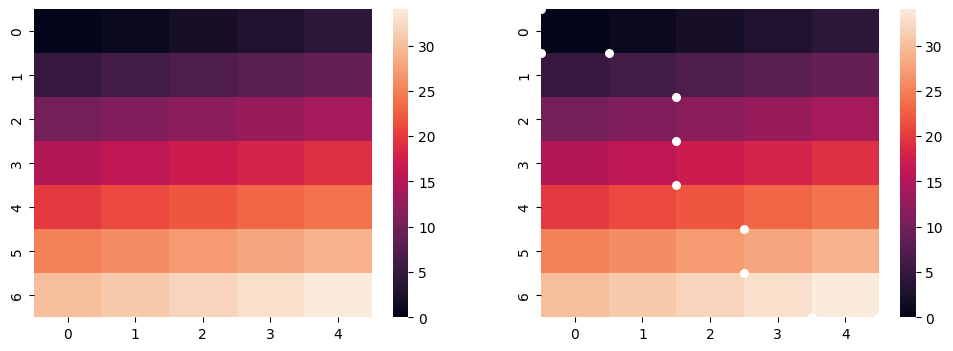

['d1_cell0', 'd1_cell1', 'd1_cell2', 'd1_cell3', 'd1_cell4'] ['d2_cell0', 'd2_cell1', 'd2_cell2', 'd2_cell3', 'd2_cell4', 'd2_cell5', 'd2_cell6']


In [12]:
# matrix from 0 to 35, 5x7
mtx = np.arange(35).reshape(7, 5)
mtx
# path1 is y coordinates
path1 = [0, 1, 1, 2, 3, 4, 5, 6, 7, 7]
path2 = [0, 0, 1, 2, 2, 2, 3, 3, 4, 5]
plot_cost_distances(mtx, mtx, path1, path2)

d1_names = [f"d1_cell{i}" for i in range(mtx.shape[1])]
d2_names = [f"d2_cell{i}" for i in range(mtx.shape[0])]
print(d1_names, d2_names)

In [13]:
max(path1), max(path2), len(d1_names), len(d2_names), mtx.shape

(7, 5, 5, 7, (7, 5))

### continue

In [14]:
# pathx must be the path that represents the x values of the path. 
#       it also indexes datasetx, so they must be the same length or less
# pathy must be the path that represents the y values of the path.
#       it also indexes datasety, so they must be the same length or less
def avg_cost_path(pathx, pathy, matrix, datasetx, datasety):
    sorted_names1 = datasetx.obs["pseudotime"].sort_values().index
    sorted_names2 = datasety.obs["pseudotime"].sort_values().index
    print(max(pathx), max(pathy), len(sorted_names1), len(sorted_names2), matrix.shape)

    assert(max(pathx)) <= len(sorted_names1), (f"pathx (max val {max(pathx)}) contains indices that are out of bounds for datasetx (length {len(sorted_names1)})")
    assert(max(pathy)) <=  len(sorted_names2), (f"pathy (max val {max(pathy)}) contains indices that are out of bounds for datasety (length {len(sorted_names2)})")

    # check that at least one of the paths goes to the end of the matrix
    # assert(max(pathx) == len(sorted_names1) - 1 or max(pathy) == len(sorted_names2) - 1), f"at least one of the paths must go to the end of the matrix. path x goes to {max(pathx)} and path y goes to {max(pathy)}, but datasetx has {len(sorted_names1)} cells and datasety has {len(sorted_names2)} cells."

    avg_costx = defaultdict(list)
    avg_costy = defaultdict(list)

    for x, y in zip(pathx, pathy):
        print(x, y, sorted_names1[x], sorted_names2[y])
        if x <= matrix.shape[1] and y <= matrix.shape[0]:
            cost = matrix[y-1, x-1]

            avg_costx[sorted_names1[x-1]].append(cost)
            avg_costy[sorted_names2[y-1]].append(cost)

    acx = [sum(x) / len(x) for x in avg_costx.values()]
    acy = [sum(x) / len(x) for x in avg_costy.values()]

    costx = pd.Series(acx, index=list(avg_costx.keys()))
    costy = pd.Series(acy, index=list(avg_costy.keys()))

    return costx, costy

In [15]:
path2 = flatten(res1.path2().values())
path1 = flatten(res1.path1().values())

In [16]:
len(dataset1.obs_names)

1386

In [17]:
max(path1), max(path2), len(dataset1.obs_names), len(dataset2.obs_names), res1.cost().shape

(np.int64(638), np.int64(1384), 1386, 640, (1385, 639))

In [18]:
costx, costy = avg_cost_path(pathx=path2, pathy=path1, matrix=res1.cost(), datasetx=dataset1, datasety=dataset2)
distx, disty = avg_cost_path(pathx=path2, pathy=path1, matrix=res1.distances()[1:, 1:], datasetx=dataset1, datasety=dataset2)

1384 638 1386 640 (1385, 639)
0 0 Run1_166469238999901 Run2_196019714415387
1 0 Run2_165302215294387 Run2_196019714415387
1 1 Run2_165302215294387 Run2_240617688264027
2 1 Run4_161340108237724 Run2_240617688264027
2 2 Run4_161340108237724 Run2_200561481181556
3 2 Run4_232321065375987 Run2_200561481181556
3 3 Run4_232321065375987 Run2_121879202785691
4 3 Run4_125677921254182 Run2_121879202785691
4 4 Run4_125677921254182 Run3_170327476390772
5 4 Run2_169022508191014 Run3_170327476390772
5 5 Run2_169022508191014 Run2_130675114993436
6 5 Run3_157562564426996 Run2_130675114993436
6 6 Run3_157562564426996 Run3_227846648679710
7 6 Run4_205870241368796 Run3_227846648679710
7 7 Run4_205870241368796 Run3_134530834552620
8 7 Run2_169727105395428 Run3_134530834552620
8 8 Run2_169727105395428 Run1_239468515544476
9 8 Run1_231760526200172 Run1_239468515544476
9 9 Run1_231760526200172 Run3_192255444339932
10 9 Run1_227921657449316 Run3_192255444339932
10 10 Run1_227921657449316 Run1_235559318048158
1

In [19]:
dataset1.obs["avg_cost_free"] = costx
dataset2.obs["avg_cost_free"] = costy
dataset1.obs["avg_dist_free"] = distx
dataset2.obs["avg_dist_free"] = disty

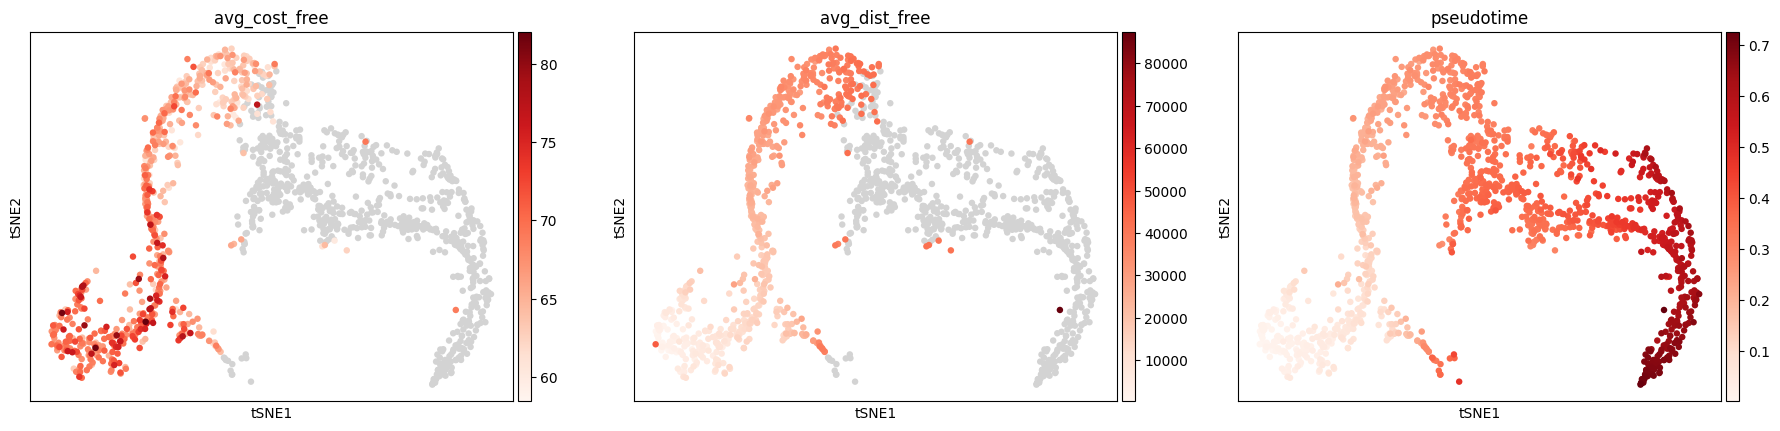

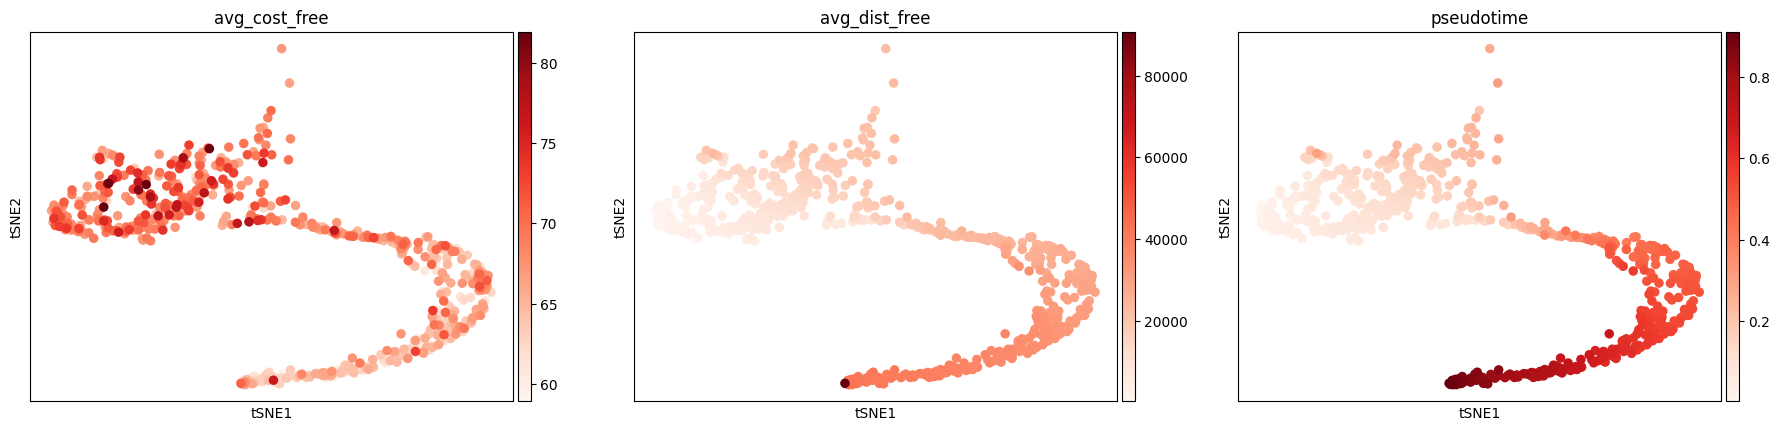

In [20]:
sc.pl.tsne(dataset1, color = ["avg_cost_free", "avg_dist_free", "pseudotime"], cmap = "Reds")
sc.pl.tsne(dataset2, color = ["avg_cost_free", "avg_dist_free", "pseudotime"], cmap = "Reds")

In [21]:
result = dynchro_wrapper(dataset1, dataset2)

In [23]:
result

TypeError: float() argument must be a string or a real number, not 'collections.defaultdict'

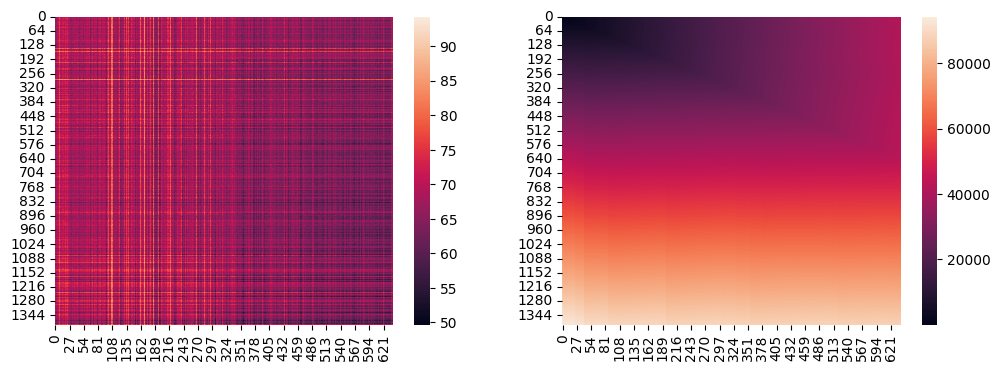

In [22]:
result[0].plot_cost_distances()

In [24]:
res1.distances().shape

(1385, 639)

In [25]:
path1 = res1.path1()
path2 = res1.path2()
print(max(path1), max(path2), len(dataset1.obs_names), len(dataset2.obs_names), res1.cost().shape)

1384 638 1386 640 (1385, 639)


In [26]:
d1_res_dist = avg_cost_path(path2, path1, res1.distances()[1:, 1:], dataset2, dataset1)
d1_res_cost = avg_cost_path(path2, path1, res1.cost(), dataset2, dataset1)


638 1384 640 1386 (1384, 638)
0 0 Run2_196019714415387 Run1_166469238999901
1 1 Run2_240617688264027 Run2_165302215294387
2 2 Run2_200561481181556 Run4_161340108237724
3 3 Run2_121879202785691 Run4_232321065375987
4 4 Run3_170327476390772 Run4_125677921254182
5 5 Run2_130675114993436 Run2_169022508191014
6 6 Run3_227846648679710 Run3_157562564426996
7 7 Run3_134530834552620 Run4_205870241368796
8 8 Run1_239468515544476 Run2_169727105395428
9 9 Run3_192255444339932 Run1_231760526200172
10 10 Run1_235559318048158 Run1_227921657449316
11 11 Run1_164631932496115 Run1_121965773437237
12 12 Run2_169727132292957 Run1_195562273392493
13 13 Run3_125728279686046 Run1_135064437582059
14 14 Run2_170180372973486 Run3_200511195925212
15 15 Run1_157477617908653 Run4_205449153394411
16 16 Run1_134447990520166 Run4_157537734613428
17 17 Run1_134530834516789 Run2_129582985538422
18 18 Run3_196113283631027 Run4_191553887755492
19 19 Run3_204403356690283 Run4_166288071772910
20 20 Run2_130126460599085 Run

In [27]:
dataset1.obs["avg_dist_on_path"] = d1_res_dist[1]
dataset2.obs["avg_dist_on_path"] = d1_res_dist[0]
dataset1.obs["avg_cost_on_path"] = d1_res_cost[1]
dataset2.obs["avg_cost_on_path"] = d1_res_cost[0]

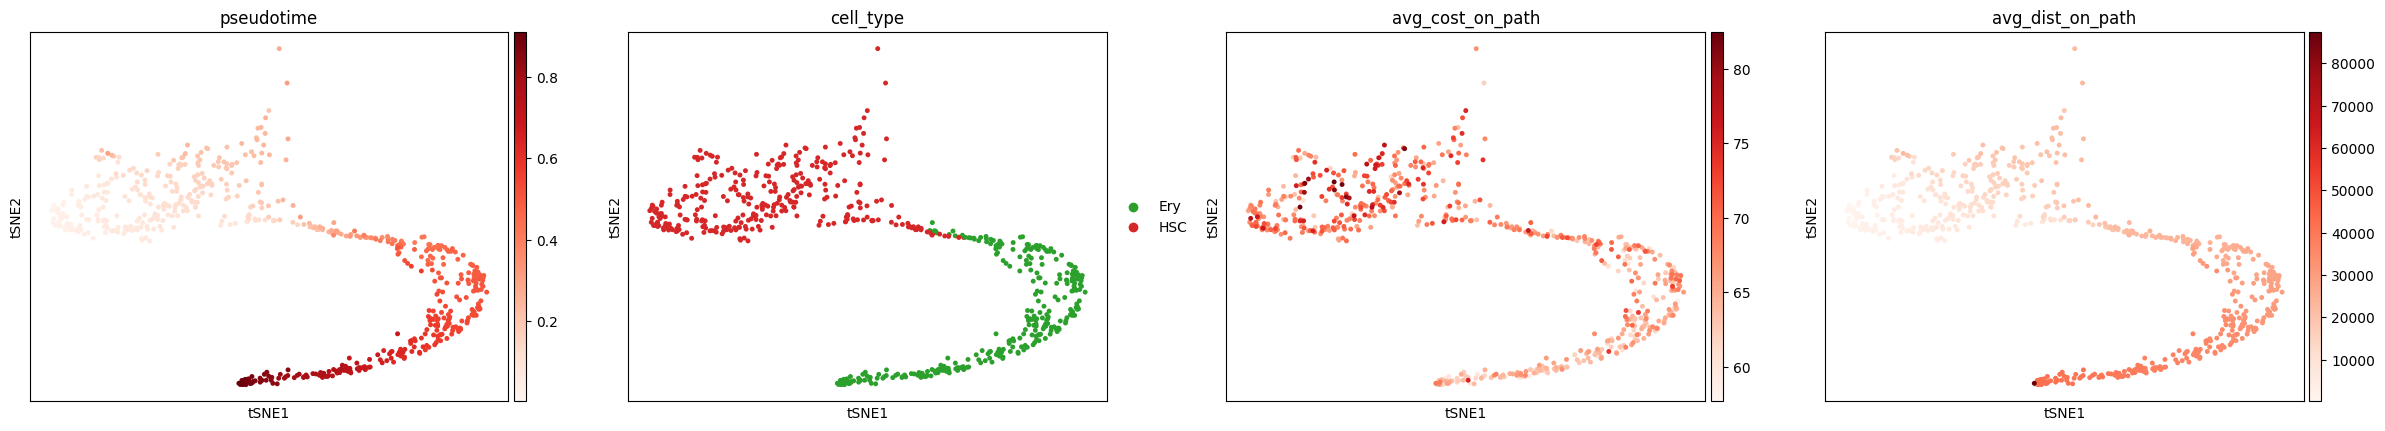

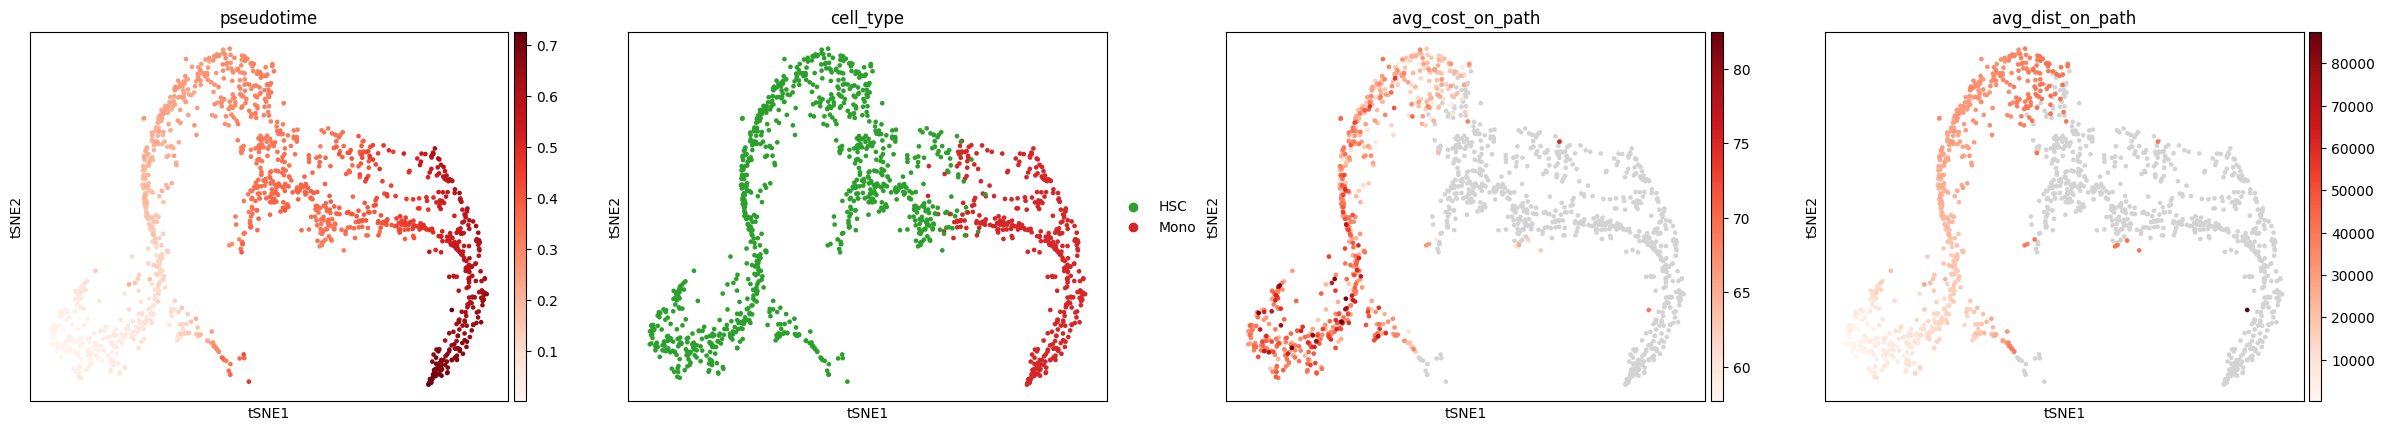

In [28]:
from matplotlib.colors import ListedColormap
from matplotlib import cm, pyplot as plt

sc.pl.tsne(dataset2, color = ["pseudotime", "cell_type", "avg_cost_on_path", "avg_dist_on_path"], cmap= "Reds", s = 50)
sc.pl.tsne(dataset1, color = ["pseudotime", "cell_type", "avg_cost_on_path", "avg_dist_on_path"], cmap= "Reds", s = 45)

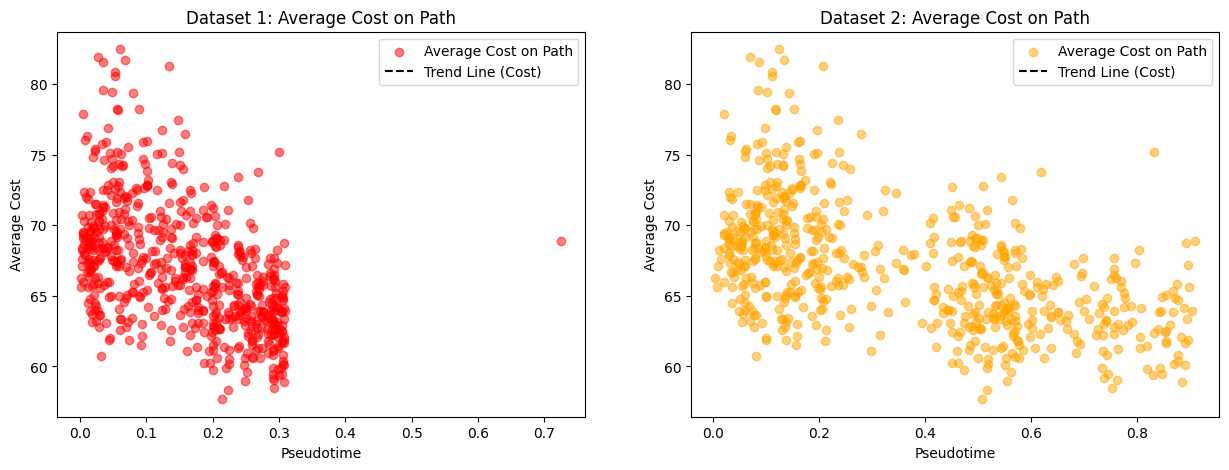

In [29]:
# plot the average cost and distance on the path  sorted by pseudotime
import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 5))
d1_avg_dist = dataset1.obs.sort_values("pseudotime")["avg_dist_on_path"].values
d1_avg_cost = dataset1.obs.sort_values("pseudotime")["avg_cost_on_path"].values
d2_avg_dist = dataset2.obs.sort_values("pseudotime")["avg_dist_on_path"].values
d2_avg_cost = dataset2.obs.sort_values("pseudotime")["avg_cost_on_path"].values

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

xvals1 = dataset1.obs.sort_values("pseudotime")["pseudotime"].values
xvals2 = dataset2.obs.sort_values("pseudotime")["pseudotime"].values

axes[0].scatter(xvals1, d1_avg_cost, label="Average Cost on Path", color='red', alpha=0.5)
b, a = np.polyfit(xvals1[:-1], d1_avg_cost[:-1], 1)
axes[0].plot(xvals1, b * xvals1 + a, color='black', linestyle='--', label='Trend Line (Cost)')
axes[0].set_title("Dataset 1: Average Cost on Path")
axes[0].set_xlabel("Pseudotime")
axes[0].set_ylabel("Average Cost")
axes[0].legend()

axes[1].scatter(xvals2, d2_avg_cost, label="Average Cost on Path", color='orange', alpha=0.5)
b, a = np.polyfit(xvals2[:-1], d2_avg_cost[:-1], 1)
axes[1].plot(xvals2, b * xvals2 + a, color='black', linestyle='--', label='Trend Line (Cost)')
axes[1].set_title("Dataset 2: Average Cost on Path")
axes[1].set_xlabel("Pseudotime")
axes[1].set_ylabel("Average Cost")
axes[1].legend()

plt.show()  

In [30]:
axes

array([<Axes: title={'center': 'Dataset 1: Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>,
       <Axes: title={'center': 'Dataset 2: Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>],
      dtype=object)

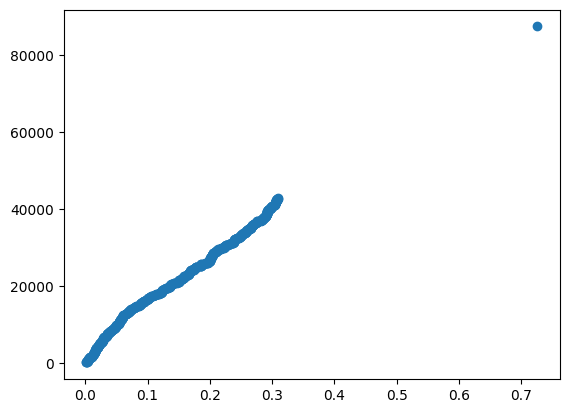

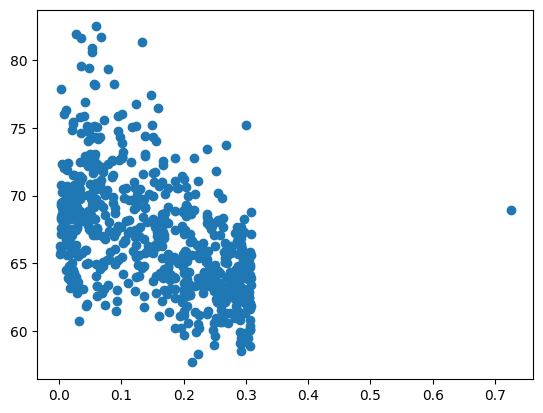

In [31]:
d1_pseudotime = dataset1.obs.sort_values("pseudotime")[["pseudotime"]].values
d2_pseudotime = dataset2.obs.sort_values("pseudotime")[["pseudotime"]].values

plt.scatter(d1_pseudotime, d1_avg_dist)
plt.show()
plt.scatter(d1_pseudotime, d1_avg_cost)

# Good alignment

In [32]:
d1_id = 15
d2_id = 20

TypeError: float() argument must be a string or a real number, not 'collections.defaultdict'

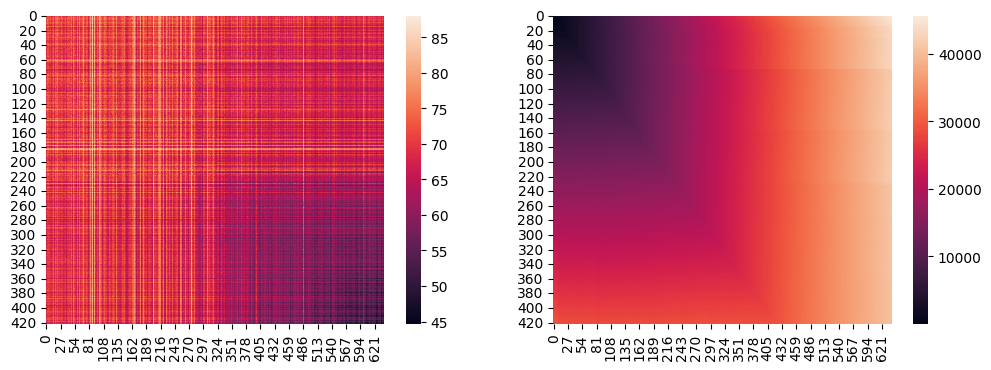

In [33]:
res2 = results_all_subsets[d1_id][d2_id][0]
res2.plot_cost_distances()

In [34]:
dataset1 = read_with_pc(f"data/rep{id_name[d1_id]['rep']}_{id_name[d1_id]['cell_type']}_subset{id_name[d1_id]['subset']}_hvg.h5ad")
dataset2 = read_with_pc(f"data/rep{id_name[d2_id]['rep']}_{id_name[d2_id]['cell_type']}_subset{id_name[d2_id]['subset']}_hvg.h5ad")

In [35]:
def skip_traceback_free2(D, i = None, j = None):
    # start from smallest value on the last row --> refers to j and q
    if i is None:
        i = D.shape[0] - 1
    if j is None:
        j = np.argmin(D[-1, :])
    print(i, j)

    p, q = [i], [j]
    while (i > 0) or (j > 0):
        tb = np.argmin((D[i - 1, j - 1], D[i, j - 1], D[i - 1, j]))
        if tb == 0:
            i -= 1
            j -= 1
        elif tb == 1:
            j -= 1
        elif tb == 2:
            i -= 1
        p.insert(0, i)
        q.insert(0, j)
    return np.array(p), np.array(q)

In [36]:
dist1 = res2.distances()
path1, path2 = traceback_xedge(dist1[1:, 1:])

NameError: name 'traceback_xedge' is not defined

In [37]:
dist1

array([[   70.1711684 ,   140.49583149,   211.75771015, ...,
        45458.99819405, 45527.44754695, 45596.98389004],
       [  140.60918182,   140.32843321,   209.4059142 , ...,
        44856.2198445 , 44923.79262608, 44992.23813262],
       [  211.76356784,   211.74949277,   214.1728968 , ...,
        44857.67695987, 44925.99601219, 44994.24006545],
       ...,
       [29084.38778745, 29079.08615305, 29078.96669427, ...,
        40383.38302317, 40432.52542934, 40481.42461069],
       [29151.09444856, 29146.48861319, 29146.29399608, ...,
        40335.4720209 , 40383.87018918, 40431.91103757],
       [29217.59003787, 29214.7774011 , 29214.73531166, ...,
        40334.36550517, 40382.49841012, 40431.55125113]], shape=(422, 640))

In [38]:
max(path1), max(path2), len(dataset1.obs_names), len(dataset2.obs_names), res2.cost().shape

(np.int64(1384), np.int64(638), 422, 640, (422, 640))

In [39]:
costx, costy  = avg_cost_path(path1, path2, res2.cost(), dataset1, dataset2)
distx, disty = avg_cost_path(path1, path2, res2.distances(), dataset1, dataset2)

1384 638 422 640 (422, 640)


AssertionError: pathx (max val 1384) contains indices that are out of bounds for datasetx (length 422)

In [40]:
dataset1.obs["avg_cost_free"] = costx
dataset2.obs["avg_cost_free"] = costy
dataset1.obs["avg_dist_free"] = distx
dataset2.obs["avg_dist_free"] = disty

In [41]:
axes

array([<Axes: title={'center': 'Dataset 1: Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>,
       <Axes: title={'center': 'Dataset 2: Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>],
      dtype=object)

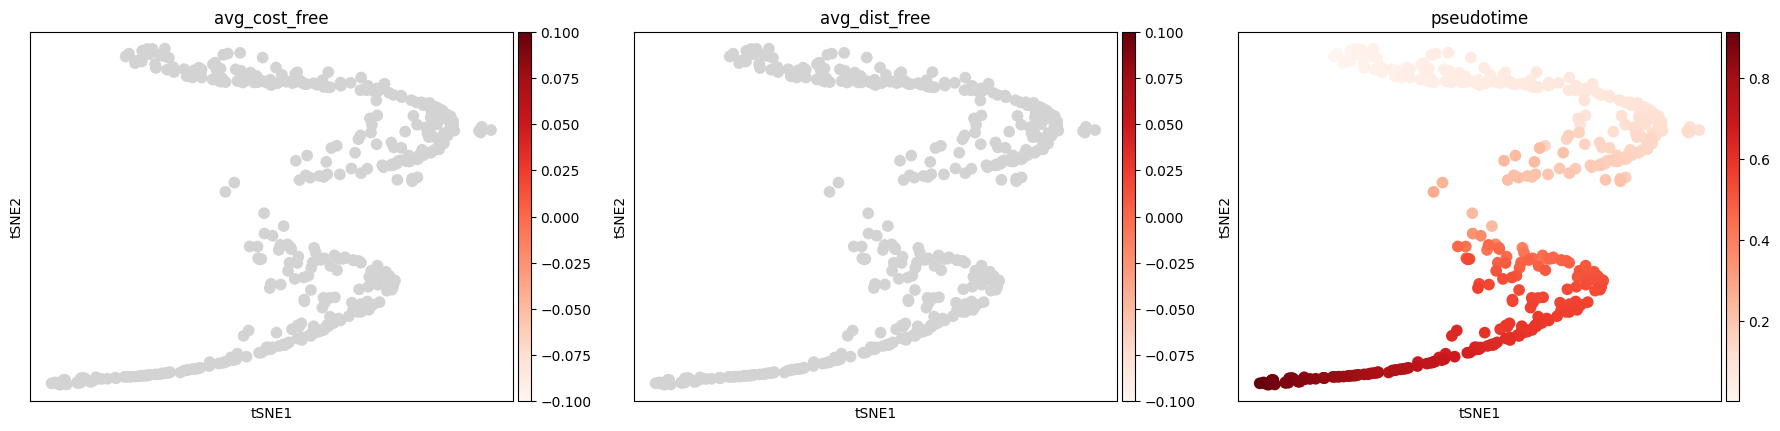

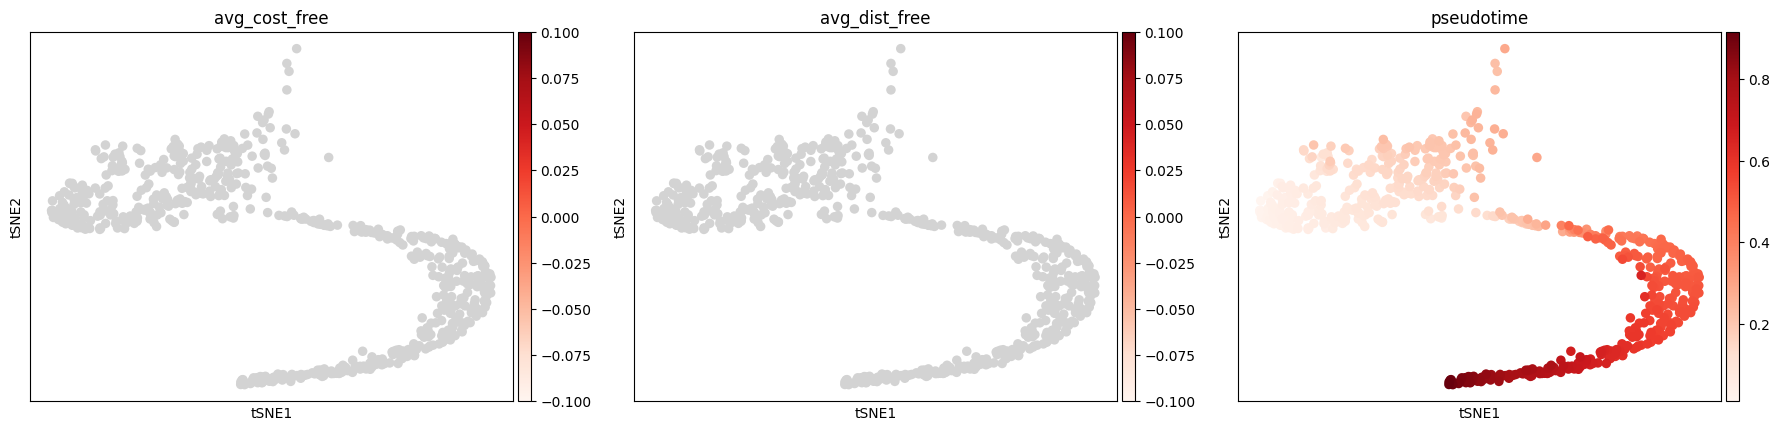

In [42]:
sc.pl.tsne(dataset1, color = ["avg_cost_free", "avg_dist_free", "pseudotime"], cmap = "Reds")
sc.pl.tsne(dataset2, color = ["avg_cost_free", "avg_dist_free", "pseudotime"], cmap = "Reds")

In [43]:
path1, path2 = traceback(D = res2.distances()[1:, 1:])

# path1 = res2.path1()
# path2 = res2.path2()

d1_res_dist = avg_cost_path(path2, path1, res2.distances()[1:, 1:], dataset2, dataset1)
d1_res_cost = avg_cost_path(path2, path1, res2.cost(), dataset2, dataset1)

dataset1.obs["avg_dist_on_path"] = d1_res_dist[1]
dataset2.obs["avg_dist_on_path"] = d1_res_dist[0]
dataset1.obs["avg_cost_on_path"] = d1_res_cost[1]
dataset2.obs["avg_cost_on_path"] = d1_res_cost[0]

638 420 640 422 (421, 639)
0 0 Run2_230809103088996 Run5_165851837091182
1 1 Run2_226883188157787 Run5_236170027060141
2 2 Run2_125197018348269 Run5_197060143499614
3 3 Run2_125042414245678 Run5_239408835575022
4 4 Run1_120703423794532 Run4_227975332281142
5 5 Run3_200416674301870 Run5_226806161627956
6 6 Run1_226883188214044 Run5_125719945824108
7 7 Run1_164753413715701 Run5_204911343230388
8 8 Run3_166400412019957 Run5_240136800856284
9 9 Run3_133974617443054 Run5_165232467957997
10 10 Run3_121812450200413 Run5_230800378226542
11 11 Run1_227982968479139 Run5_232327461693355
12 12 Run2_230800346995508 Run5_191691433929972
13 13 Run1_122308399675764 Run5_162090681260395
14 14 Run1_134531742063323 Run4_131234312146284
15 15 Run3_161478620429100 Run5_230816707439524
16 16 Run3_231270792777134 Run5_239468515801334
17 17 Run1_196180763073947 Run5_134938019158445
18 18 Run1_201114457959275 Run4_130144713726813
19 19 Run2_239408816249651 Run5_235198527760156
20 20 Run1_161462676572910 Run5_1

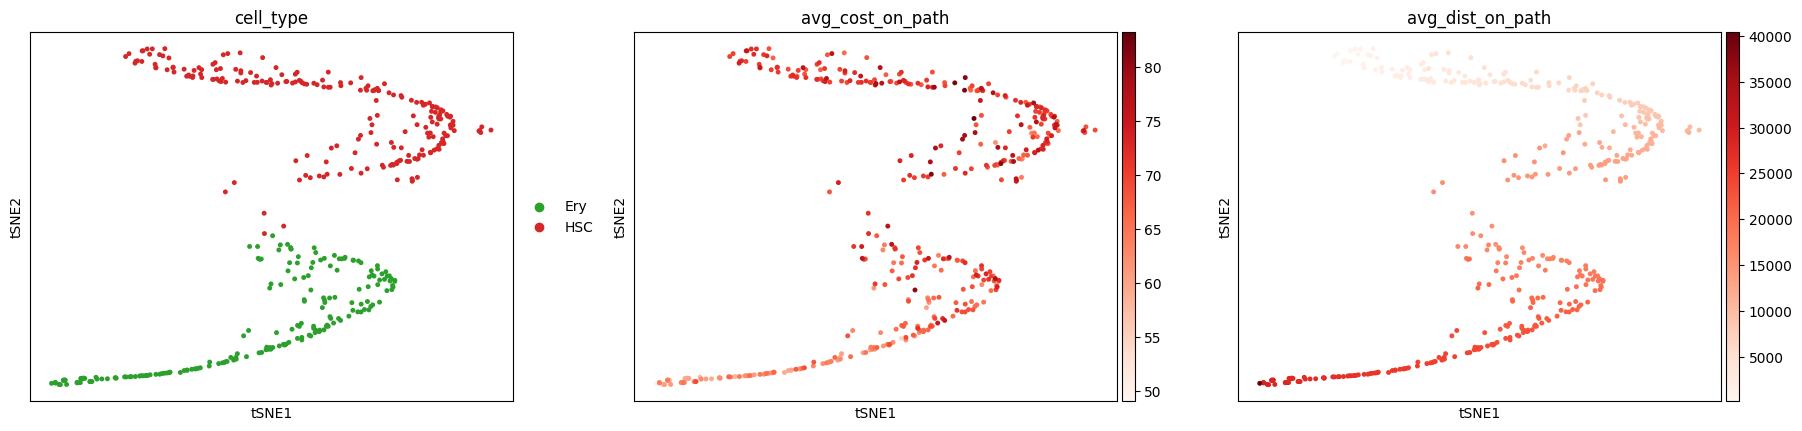

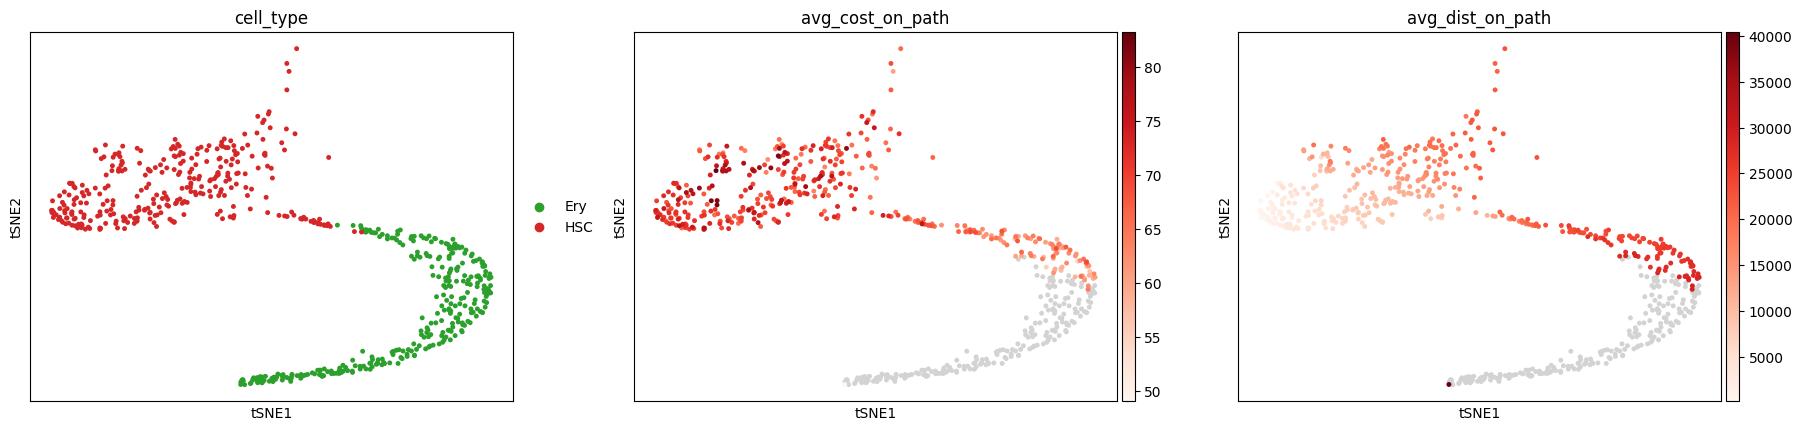

In [44]:
sc.pl.tsne(dataset1, color = ["cell_type", "avg_cost_on_path", "avg_dist_on_path"], cmap= "Reds", s = 50)
sc.pl.tsne(dataset2, color = ["cell_type", "avg_cost_on_path", "avg_dist_on_path"], cmap= "Reds", s = 50)

<Figure size 1000x500 with 0 Axes>

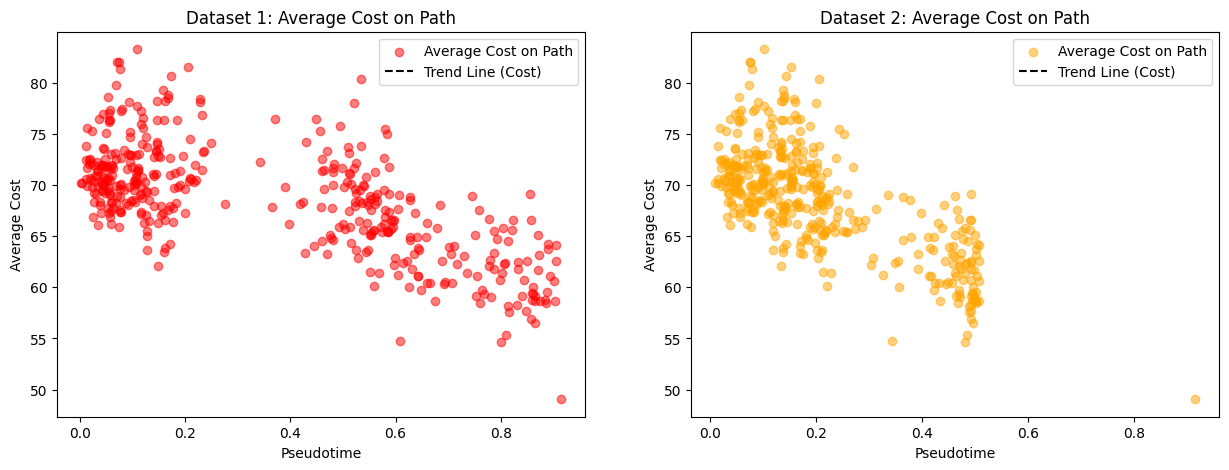

In [45]:
# plot the average cost and distance on the path  sorted by pseudotime
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
d1_avg_dist = dataset1.obs.sort_values("pseudotime")["avg_dist_on_path"].values
d1_avg_cost = dataset1.obs.sort_values("pseudotime")["avg_cost_on_path"].values
d2_avg_dist = dataset2.obs.sort_values("pseudotime")["avg_dist_on_path"].values
d2_avg_cost = dataset2.obs.sort_values("pseudotime")["avg_cost_on_path"].values

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

xvals1 = dataset1.obs.sort_values("pseudotime")["pseudotime"].values
xvals2 = dataset2.obs.sort_values("pseudotime")["pseudotime"].values

axes[0].scatter(xvals1, d1_avg_cost, label="Average Cost on Path", color='red', alpha=0.5)
b, a = np.polyfit(xvals1[:-1], d1_avg_cost[:-1], 1)
axes[0].plot(xvals1, b * xvals1 + a, color='black', linestyle='--', label='Trend Line (Cost)')
axes[0].set_title("Dataset 1: Average Cost on Path")
axes[0].set_xlabel("Pseudotime")
axes[0].set_ylabel("Average Cost")
axes[0].legend()

axes[1].scatter(xvals2, d2_avg_cost, label="Average Cost on Path", color='orange', alpha=0.5)
b, a = np.polyfit(xvals2[:-1], d2_avg_cost[:-1], 1)
axes[1].plot(xvals2, b * xvals2 + a, color='black', linestyle='--', label='Trend Line (Cost)')
axes[1].set_title("Dataset 2: Average Cost on Path")
axes[1].set_xlabel("Pseudotime")
axes[1].set_ylabel("Average Cost")
axes[1].legend()

plt.show()  